In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/store.csv')
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [5]:
#Handle null values of numeric data types
df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean(),inplace=True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mean(),inplace=True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mean(),inplace=True)
df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].mean(),inplace=True)
df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].mean(),inplace=True)

In [6]:
#handle null value of object type
df['PromoInterval'].fillna(df['PromoInterval'].mode()[0],inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
train=pd.read_csv('/content/train.csv')


In [11]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [12]:
#1. Isolate the dataset into time series data

In [13]:
# Convert Date to datetime format
train["Date"] = pd.to_datetime(train["Date"])
train["Date"]

,Date
0,2015-07-31
1,2015-07-31
2,2015-07-31
3,2015-07-31
4,2015-07-31
...,...
1017204,2013-01-01
1017205,2013-01-01
1017206,2013-01-01
1017207,2013-01-01


In [14]:
#Set Date as index


# Convert Date to datetime format
train["Date"] = pd.to_datetime(train["Date"])

#Aggregate sales by date (sum over all stores for simplicity)
time_series_data = train.groupby("Date")["Sales"].sum().reset_index()

#Set Date as index
time_series_data.set_index("Date", inplace=True)

time_series_data

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


In [15]:
#Aggregate sales by date (sum over all stores for simplicity)
time_series_data = train.groupby("Date")["Sales"].sum().reset_index()

time_series_data

,Date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
937,2015-07-27,10707292
938,2015-07-28,9115073
939,2015-07-29,8499962
940,2015-07-30,8798854


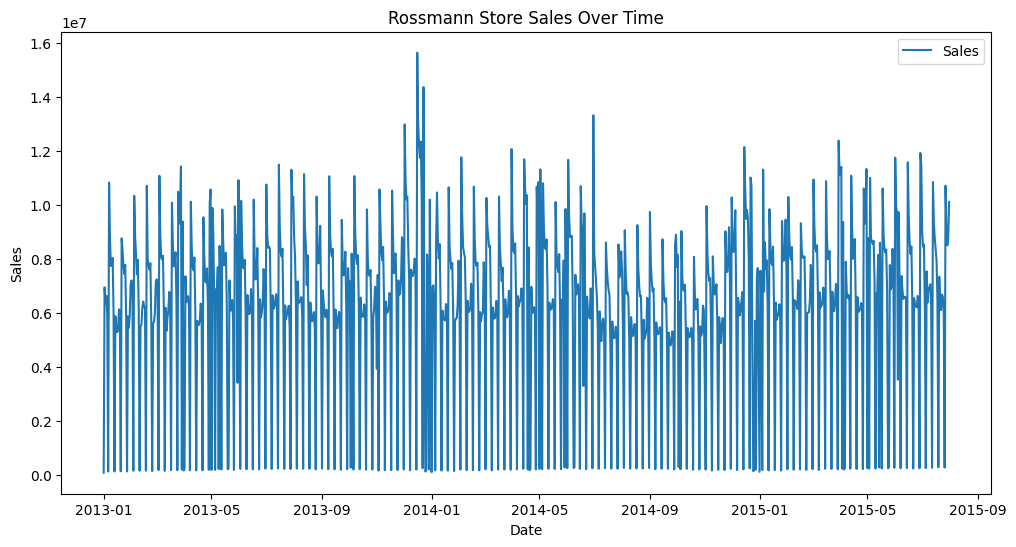

In [16]:
# Check stationarity using visualization and ADF test
plt.figure(figsize=(12, 6))
# Plot the 'Sales' column against the 'Date' index
plt.plot(time_series_data["Date"], time_series_data["Sales"], label="Sales")
plt.title("Rossmann Store Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [18]:
#Check whether your time Series Data is Stationary
#The Augmented Dickey-Fuller (ADF) test, implemented in statsmodels as adfuller(), is a statistical test used to check if a time series is stationary (i.e., if its properties like mean and variance remain constant over time).

#A time series is stationary if its statistical properties (mean, variance, and autocorrelation) do not change over time.It does not have trends or seasonality.

#Augmented Dickey-Fuller Test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary (Reject H0)")
    else:
        print("The data is NOT stationary (Fail to Reject H0)")

check_stationarity(time_series_data["Sales"])

ADF Statistic: -4.761614524595619
p-value: 6.436731330559227e-05
The data is stationary (Reject H0)


In [19]:
#Depending on your conclusion from 2 above difference your time series data


In [20]:
#  Apply Differencing if Non-Stationary
time_series_data["Sales_Diff"] = time_series_data["Sales"].diff().dropna()

# Check stationarity again after differencing
check_stationarity(time_series_data["Sales_Diff"].dropna())


ADF Statistic: -14.008528601649763
p-value: 3.750044004604795e-26
The data is stationary (Reject H0)


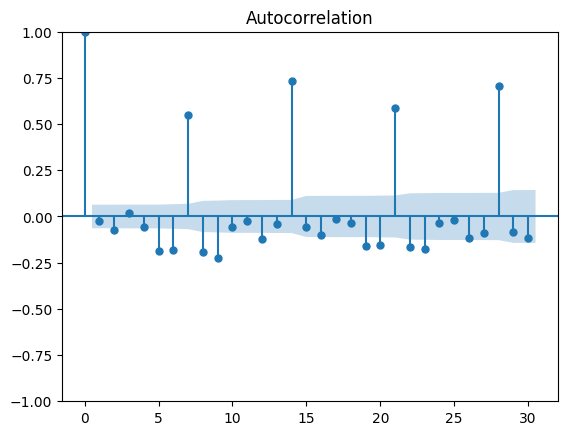

In [21]:
## Check for autocorrelation and partial autocorrelation
plot_acf(time_series_data["Sales"])  # Autocorrelation plot
plt.title("Autocorrelation")
plt.show()

This is an autocorrelation plot, which helps analyze how a time series (likely sales data) is related to its past values.

Lag 0 is always 1 – The correlation of a time series with itself is always 1.

Strong spikes at regular intervals – There are high autocorrelations at lags 7, 14, 21, and 28, suggesting a weekly sales pattern.

Lower values for other lags – Other points fluctuate around zero, meaning sales are less correlated with non-weekly lags.

Text(0.5, 1.0, 'Partial Autocorrelation')

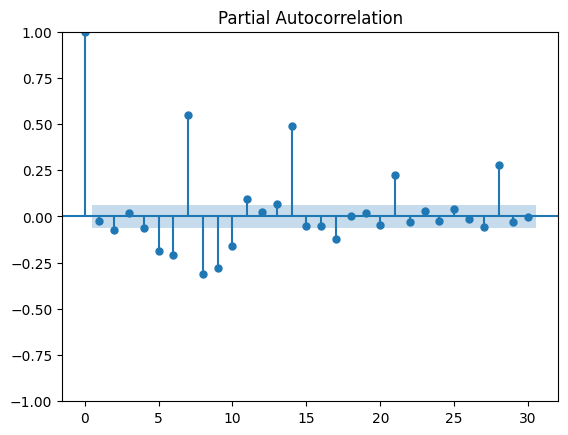

In [22]:
plot_pacf(time_series_data["Sales"])  # Partial Autocorrelation plot
plt.title("Partial Autocorrelation")

This is a Partial Autocorrelation Function (PACF) plot, which helps determine the direct relationship between a time series and its past values while removing the effects of intermediate lags.

Key Observations:
Lag 0 is always 1 – A time series is always 100% correlated with itself.

Significant spikes at lags 7, 14, and 28 – These suggest a weekly seasonality, similar to the autocorrelation (ACF) plot.

Weaker correlations beyond the first few lags – This means that, after accounting for the effects of closer lags, further lags contribute less directly to predicting sales.

Some negative lags – This indicates that certain past sales values negatively impact future sales, possibly due to demand fluctuations.

ACF shows overall correlation, including indirect effects.

PACF removes indirect relationships, showing only the direct impact of each lag.

In [23]:
#Many models, like ARIMA, assume that the time series is stationary.

In [24]:
## Transform the time series data into supervised learning data by creating a new y(target) column.

# Selecting relevant columns (time-dependent features)
#train = train[['Sales','Customers']]  #

# Creating lag features (previous days' sales as predictors)
train['Sales_previous_day'] = train['Sales'].shift(1)  # Sales of the previous day
train['Sales_a_week_ago'] = train['Sales'].shift(7)  # Sales from a week ago
train['Sales_two_week_ago'] = train['Sales'].shift(14)  # Sales from two weeks ago

# Creating the target variable (next day's sales)
train['Target_sale'] = train['Sales'].shift(-1)  # Target: Sales of the next day

# Dropping NaN values created due to shifting
train.dropna(inplace=True)

# Display first few rows
print(train.head())

    Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
14     15          5 2015-07-31   9191        766     1      1            0   
15     16          5 2015-07-31  10231        979     1      1            0   
16     17          5 2015-07-31   8430        946     1      1            0   
17     18          5 2015-07-31  10071        936     1      1            0   
18     19          5 2015-07-31   8234        718     1      1            0   

    SchoolHoliday  Sales_previous_day  Sales_a_week_ago  Sales_two_week_ago  \
14              1              6544.0            8492.0              5263.0   
15              1              9191.0            8565.0              6064.0   
16              1             10231.0            7185.0              8314.0   
17              1              8430.0           10457.0             13995.0   
18              1             10071.0            8959.0              4822.0   

    Target_sale  
14      10231.0  
15       8430.

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the 'Sales' column for sliding window transformation
train = train[['Sales']]

# Define the sliding window size
window_size = 7

# Create lag features using a sliding window approach
for i in range(1, window_size + 1):
    train[f'Sales_lag_{i}'] = train['Sales'].shift(i)

# Define the target variable (next day's sales)
train['y'] = train['Sales'].shift(-1)

# Drop NaN values due to shifting
train.dropna(inplace=True)

# Separate features (X) and target (y)
X = train.drop(columns=['y'])
y = train['y'].values.reshape(-1, 1)  # Reshape for scaling

# Applying sliding window to df.merge (as it contains 'Sales')
train = train[['Sales']]  # Reset df.merge to only 'Sales' column

# Define the sliding window size
window_size = 7

# Create lag features using a sliding window approach
for i in range(1, window_size + 1):
    train[f'Sales_lag_{i}'] = train['Sales'].shift(i)

# Define the target variable (next day's sales)
train['y'] = train['Sales'].shift(-1)

# Drop NaN values due to shifting
train.dropna(inplace=True)

# Separate features (X) and target (y)
X = train.drop(columns=['y'])
y = train['y'].values.reshape(-1, 1)  # Reshape for scaling

In [26]:
## Scale data to range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Use the index from X instead of df
X_scaled_df = pd

In [27]:
test=pd.read_csv('/content/test.csv')

In [28]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [29]:
train

,Sales,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_lag_4,Sales_lag_5,Sales_lag_6,Sales_lag_7,y
28,9411,7301.0,13213.0,7818.0,14180.0,14190.0,7273.0,6566.0,4776.0
29,4776,9411.0,7301.0,13213.0,7818.0,14180.0,14190.0,7273.0,7248.0
30,7248,4776.0,9411.0,7301.0,13213.0,7818.0,14180.0,14190.0,6395.0
31,6395,7248.0,4776.0,9411.0,7301.0,13213.0,7818.0,14180.0,10789.0
32,10789,6395.0,7248.0,4776.0,9411.0,7301.0,13213.0,7818.0,11144.0
...,...,...,...,...,...,...,...,...,...
1017201,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017202,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017203,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017204,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
train = pd.DataFrame(train,columns=["Sales"])

In [34]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train)

In [35]:
# Convert to supervised learning format
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

In [36]:
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [37]:
# Reshape for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [38]:
model = Sequential([
    LSTM(25, activation="relu", return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])

In [39]:
# Compile and train the model
model.compile(optimizer="RMSprop", loss="mse")
model.fit(X, y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 184s 6ms/step - loss: 0.0042
Epoch 2/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 181s 6ms/step - loss: 0.0041
Epoch 3/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 175s 6ms/step - loss: 0.0041
Epoch 4/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 178s 6ms/step - loss: 0.0040
Epoch 5/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 202s 6ms/step - loss: 0.0040
Epoch 6/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 204s 6ms/step - loss: 0.0040
Epoch 7/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 178s 6ms/step - loss: 0.0040
Epoch 8/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 182s 6ms/step - loss: 0.0040
Epoch 9/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 178s 6ms/step - loss: 0.0040
Epoch 10/10
31787/31787 ━━━━━━━━━━━━━━━━━━━━ 179s 6ms/step - loss: 0.0040


In [40]:
#model.summary()

In [41]:
# Predict on test data
predictions = model.predict(X_test)
predictions

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


array([[0.17832115],
       [0.17437363],
       [0.18135524],
       ...,
       [0.01110518],
       [0.01110518],
       [0.01110518]], dtype=float32)

In [42]:
# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_actual

array([[10644.],
       [ 5621.],
       [ 5491.],
       ...,
       [    0.],
       [    0.],
       [    0.]])

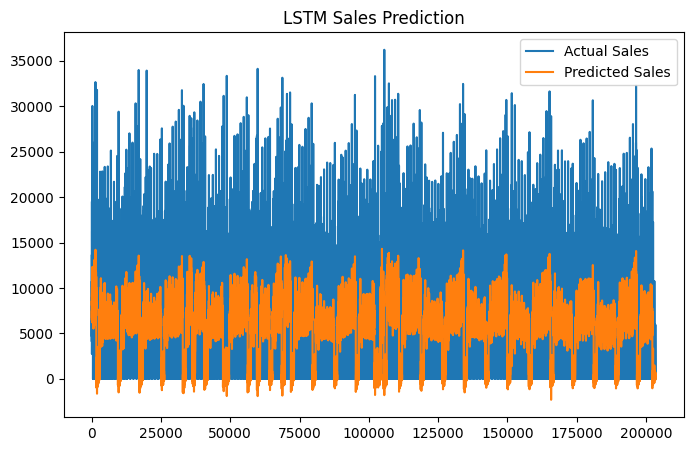

In [43]:
# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(y_test_actual, label="Actual Sales")
plt.plot(predictions, label="Predicted Sales")
plt.legend()
plt.title("LSTM Sales Prediction")
plt.show()

This plot shows the actual vs. predicted sales using an LSTM (Long Short-Term Memory) model, a type of neural network designed for time series forecasting.

Blue Line (Actual Sales)
Represents real historical sales data.
Shows high variability with spikes, indicating seasonality and trends.

Orange Line (Predicted Sales)
Represents the sales forecast generated by the LSTM model.
Captures the general pattern of actual sales but appears underestimated in some high peaks.


In [44]:
# Save the trained model
model.save("lstm_sales_model.h5")